In [1]:
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt   
import seaborn as sns    

In [2]:
data = pd.read_csv('online.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.shape 

(6362620, 11)

* <font color='DarkOrange'>step</font> : represents a unit of time where 1 step equals 1 hour
* <font color='Pink'>type</font> : type of online transaction
* <font color='Orange'>amount</font> : the amount of the transaction
* <font color='Yellow'>nameOrig</font> : customer starting the transaction
* <font color='Purple'>oldbalanceOrg</font> : balance before the transaction
* <font color='Green'>newbalanceOrig</font> : balance after the transaction
* <font color='Brown'>nameDest</font> : recipient of the transaction
* <font color='Tomato'>oldbalanceDest</font> : initial balance of recipient before the transaction
* <font color='DarkKhaki'>newbalanceDest</font> : the new balance of recipient after the transaction
* <font color='red'>isFraud</font> : fraud transaction

In [4]:
print(data.isnull().sum()) 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
# Exploring transaction type
print(data.type.value_counts()) # 0 - Cash in, 1 - Cash out, 2 - Debit, 3 - Payment, 4 - Transfer

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [7]:
!pip install plotly


   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.1 MB 1.0 MB/s eta 0:00:15
   -- ------------------------------------- 1.0/16.1 MB 1.2 MB/s eta 0:00:13
   --- ------------------------------------ 1.3/16.1 MB 1.4 MB/s eta 0:00:11
   ----- ---------------------------------- 2.1/16.1 MB 1.6 MB/s eta 0:00:09
   ----- ---------------------------------- 2.4/16.1 MB 1.6 MB/s eta 0:00:09
   ------ --------------------------------- 2.6/16.1 MB 1.5 MB/s eta 0:00:09
   ------- -------------------------------- 2.9/16.1 MB 1.5 MB/s eta 0:00:09
   ------- -------------------------------- 3.1/16.1 MB 1.5 MB/s eta 0:00:09
   --------- ------------------------------ 3.7/16.1 MB 1.6 MB/s eta 0:00:08
   ----------- ---------------------------- 4.5/16.1 MB 1.7 MB/s eta 0:00:07
   ----------- -----


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import plotly.express as px

# Count transaction types properly
type_counts = data["type"].value_counts().reset_index()
type_counts.columns = ["Transaction", "Count"]

# Use the summary data to create the pie chart
fig = px.pie(type_counts,
             names="Transaction",
             values="Count",
             hole=0.5,
             title="Distribution of Transaction Type")
fig.show()


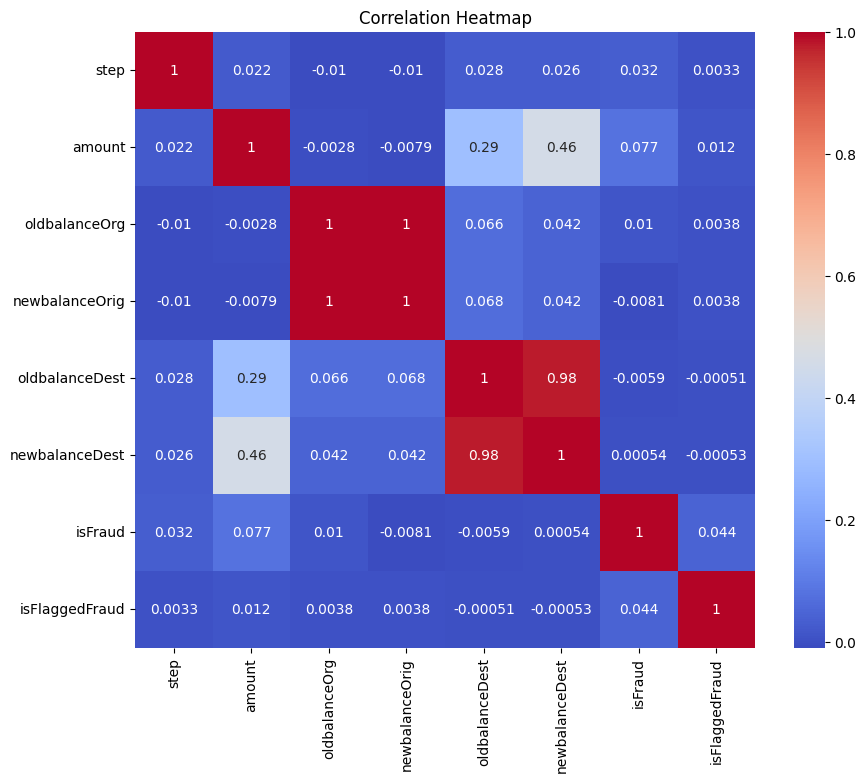

In [11]:
# Select only numerical columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
     

In [12]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [13]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [14]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9997422445470576


In [15]:
import pickle
# pickle.dump(mode|l, open("model.pkl", "wb"))

In [18]:
import sklearn
print(sklearn.__version__)


1.4.2


In [19]:
pip install --upgrade scikit-learn


  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [26]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)



In [27]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict([[4, 181.00, 181.0, 0]])
print(y_pred)

['Fraud']


In [28]:
import os
print(os.path.exists("static/model.pkl"))  # should print True


True
